## Importing the dataset

In [1]:
import pandas as pd

df=pd.read_csv(r'C:\Users\Virat\Desktop\New folder\ML\IRIS Classification\IRIS.csv')
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


## Data Analysing

### 1. Data types

In [2]:
print(df.info())
print('Size: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Size:  (150, 5)


### 2. Checking the null values

In [3]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### 3. Data Visualization

### a) Features

<AxesSubplot:ylabel='count'>

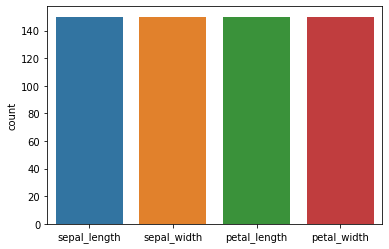

In [4]:
import seaborn as sns

sns.countplot(data=df)

In [5]:
print(df.count())

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64


### b) Target

C:\Users\Virat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

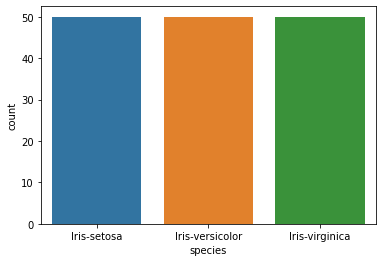

In [6]:
sns.countplot('species', data=df)

In [7]:
print(df['species'].value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64


### c) Correlation between features

<AxesSubplot:>

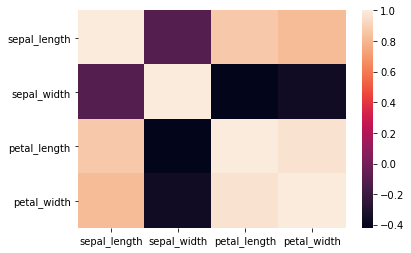

In [8]:
sns.heatmap(df.corr())

In [9]:
print(df.corr())

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


### d) Features visualization using boxplot

<AxesSubplot:xlabel='species', ylabel='petal_width'>

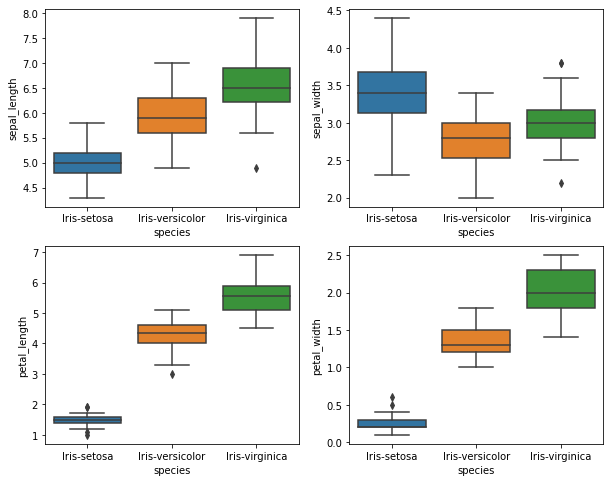

In [10]:
from matplotlib import pyplot as plt
fig, axes= plt.subplots(2,2, figsize=(10, 8))
sns.boxplot(x='species', y='sepal_length', data=df, ax=axes[0,0])
sns.boxplot(x='species', y='sepal_width', data=df, ax=axes[0,1])
sns.boxplot(x='species', y='petal_length', data=df, ax=axes[1,0])
sns.boxplot(x='species', y='petal_width', data=df, ax=axes[1,1])

### e) Interrelation between features(petal_width and sepal_width) and target using violinplot

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

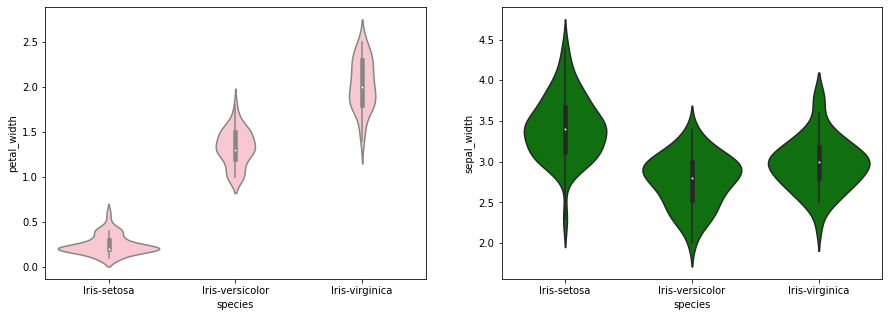

In [11]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.violinplot(x='species', y='petal_width', data  = df , color='pink', ax=axes[0])
sns.violinplot(x='species', y='sepal_width', data  = df , color='green', ax=axes[1])

### f) Visualization of interrelated features w.r.t species using scatterplot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

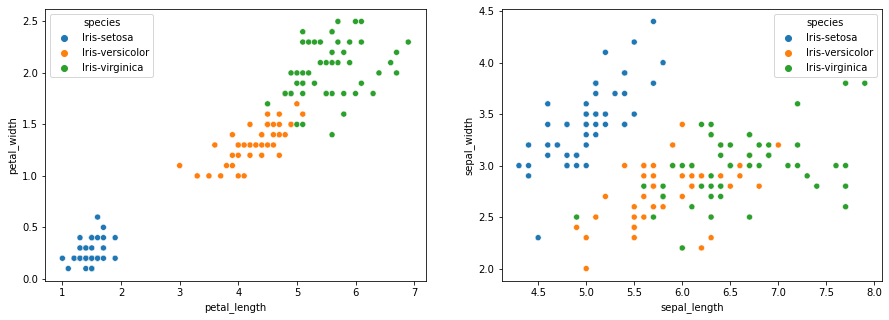

In [12]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', ax=axes[0])
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species', ax=axes[1])

### g) Features visualization using pairplot

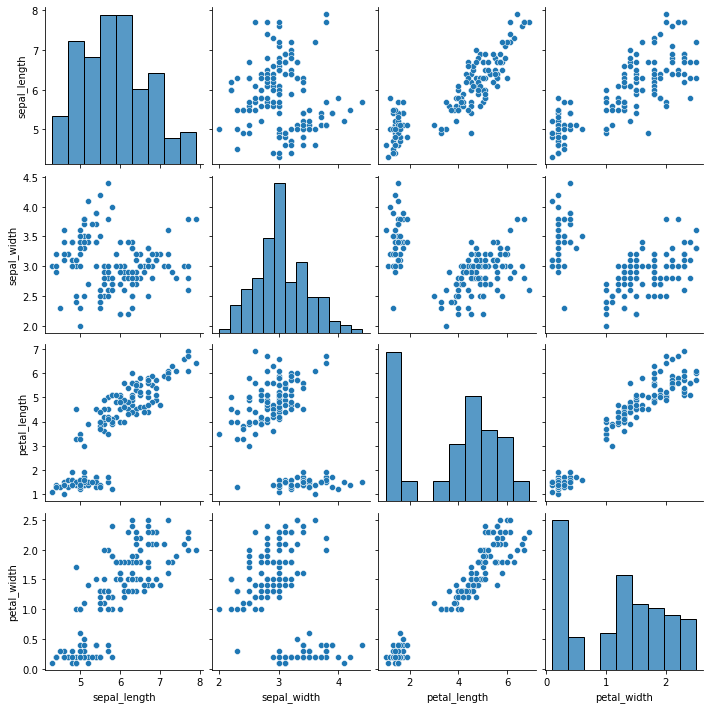

In [13]:
sns.pairplot(data=df)

### Preprocessing and Splitting the data

In [14]:
X=df.drop(['species'], axis=1)
Y=df['species']
print(X.head())
print(Y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.4,random_state=42)
print('Xtrain: ', Xtrain.shape)
print('Xtest: ', Xtest.shape)
print('Ytrain: ', ytrain.shape)
print('Ytest: ', ytest.shape)

Xtrain:  (90, 4)
Xtest:  (60, 4)
Ytrain:  (90,)
Ytest:  (60,)


## Training and Testing the data

### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
d_clf=DecisionTreeClassifier()
d_clf.fit(Xtrain, ytrain)
y_predict=d_clf.predict(Xtest)

### Accuracy

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_predict, ytest)*100
print(accuracy)

96.66666666666667
